In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

In [114]:
df = pd.read_csv('gbm-data.csv')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0
7,1,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,...,0,0,1,0,1,0,0,0,0,0
8,1,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0
9,0,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.8, random_state=241)

In [116]:
lrn_rates = [0.2]
ans_train = []
ans_test = []
for learning_rate in lrn_rates:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=learning_rate, verbose=True)
    clf.fit(X_train,y_train)
    a = clf.staged_decision_function(X_train)
    b = clf.staged_decision_function(X_test)
    ans_train.append(a)
    ans_test.append(b)

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.46s
         2           1.1715           11.54s
         3           1.1009           11.04s
         4           1.0529           11.08s
         5           1.0130           10.89s
         6           0.9740           10.91s
         7           0.9475           10.22s
         8           0.9197           10.17s
         9           0.8979            9.73s
        10           0.8730            9.66s
        20           0.7207            7.97s
        30           0.6055            7.08s
        40           0.5244            6.64s
        50           0.4501            6.28s
        60           0.3908            5.92s
        70           0.3372            5.66s
        80           0.3009            5.36s
        90           0.2603            5.05s
       100           0.2327            4.69s
       200           0.0835            1.49s


In [117]:
tmp_train = list(ans_train[0])
tmp_test = list(ans_test[0])

In [118]:
pred_prob_train = list(map(lambda x: 1/(1+np.e**(-x)), tmp_train))
pred_prob_test = list(map(lambda x: 1/(1+np.e**(-x)), tmp_test))


In [119]:
loss_train = []
loss_test = []
for i in range(250):
    loss_train.append(log_loss(y_train,pred_prob_train[i]))
    loss_test.append(log_loss(y_test,pred_prob_test[i]))
    

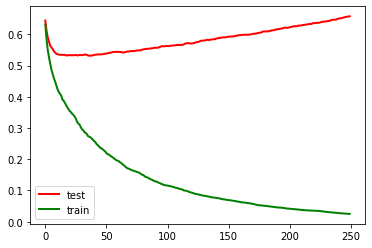

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [121]:
loss_test.index(min(loss_test)), min(loss_test)

(36, 0.5314949511258739)

In [110]:
clf = RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train,y_train)
log_loss(y_test,clf.predict_proba(X_test))

0.5410941951182815

In [ ]:
#target=np.array(pd.read_csv('5-2_gbm-data.csv',usecols=['Activity']))#features=np.array(pd.read_csv('5-2_gbm-data.csv',usecols=range(1,1177)))data=pd.read_csv('5-2_gbm-data.csv')target=data.values[:,0]features=data.values[:,1:]